In [1]:
import glob
import math
import sys
import timeit

sys.path.insert(0, '../../')
from visualize_dataset import *
from losses import *
from metrics import *
from predict import *
from train import *
from utils import *

Using TensorFlow backend.


In [2]:
path_train_images = '../../../data/stanford_max_lesion_area_fused_cropped/train/Slice/'
path_train_annotations = '../../../data/stanford_max_lesion_area_fused_cropped/train/ROI/'
path_train_predictions = './predictions.50e/train/'

path_val_images = '../../../data/stanford_max_lesion_area_fused_cropped/val/Slice/'
path_val_annotations = '../../../data/stanford_max_lesion_area_fused_cropped/val/ROI/'
path_val_predictions = './predictions.50e/val/'

path_test_images = '../../../data/stanford_max_lesion_area_fused_cropped/test/Slice/'
path_test_annotations = '../../../data/stanford_max_lesion_area_fused_cropped/test/ROI/'
path_test_predictions = './predictions.50e/test/'

path_save_weights = './weights.50e/'
path_load_weights = None

train_vgg = False
path_vgg_weights = '../../../data/vgg16_weights_th_dim_ordering_th_kernels.h5'

n_classes = 2
input_height = 224
input_width = 224
n_channel_annotations = 1

In [3]:
print('Number train images: ', len(glob.glob(path_train_images + '*.png')))
print('Number val images: ', len(glob.glob(path_val_images + '*.png')))
print('Number test images: ', len(glob.glob(path_test_images + '*.png')))

Number train images:  376
Number val images:  15
Number test images:  14


In [4]:
model_name = 'vgg_bayesian_segnet'
epochs = 50
train_batch_size = 8
val_batch_size = len(glob.glob(path_val_images + '*.png'))

In [5]:
optimizer = 'adadelta'
metrics = ['accuracy', dice, iou]

class_props = calc_class_proportions(path_train_annotations, n_classes, n_channel_annotations)
class_weights = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations)
class_weights_log = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations, scale = 'log')

print(class_props)
print(class_weights)
print(class_weights_log)

loss = weighted_categorical_crossentropy_loss(class_weights_log)

[0.97803434 0.02196566]
[ 1.         44.52560761]
[0.0222105  3.81827497]


Model output shape (None, 50176, 2)
Epoch 0
Epoch 1/1
47/47 [==============================] - 1606s 34s/step - loss: 0.0366 - acc: 0.6304 - dice: 0.0903 - iou: 0.0476 - val_loss: 0.0435 - val_acc: 0.8000 - val_dice: 0.1133 - val_iou: 0.0601
Epoch 1
Epoch 1/1
47/47 [==============================] - 1637s 35s/step - loss: 0.0233 - acc: 0.6915 - dice: 0.1153 - iou: 0.0616 - val_loss: 0.0750 - val_acc: 0.8878 - val_dice: 0.1140 - val_iou: 0.0605
Epoch 2
Epoch 1/1
47/47 [==============================] - 1635s 35s/step - loss: 0.0201 - acc: 0.7639 - dice: 0.1443 - iou: 0.0783 - val_loss: 0.0741 - val_acc: 0.9054 - val_dice: 0.1300 - val_iou: 0.0695
Epoch 3
Epoch 1/1
47/47 [==============================] - 1634s 35s/step - loss: 0.0183 - acc: 0.8061 - dice: 0.1714 - iou: 0.0947 - val_loss: 0.0768 - val_acc: 0.9045 - val_dice: 0.0979 - val_iou: 0.0515
Epoch 4
Epoch 1/1
47/47 [==============================] - 1637s 35s/step - loss: 0.0158 - acc: 0.8453 - dice: 0.2064 - iou: 0.1167 - val_lo

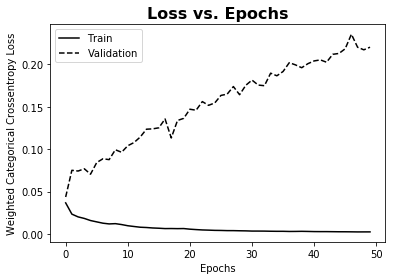

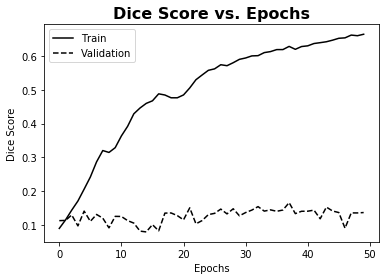

In [6]:
start = timeit.default_timer()
train(
    path_train_images, path_train_annotations, train_batch_size, 
    path_val_images, path_val_annotations, val_batch_size,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights, path_vgg_weights = path_vgg_weights, train_vgg = train_vgg, path_load_weights = None
)
end = timeit.default_timer()

In [7]:
print('Total training time: ', end - start)

Total training time:  63164.962534807


In [9]:
epochs = 38

In [10]:
predict(
    path_train_images, path_train_annotations, path_train_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics, 
    path_save_weights
)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99  18491024
           1       0.64      0.96      0.77    375152

   micro avg       0.99      0.99      0.99  18866176
   macro avg       0.82      0.98      0.88  18866176
weighted avg       0.99      0.99      0.99  18866176

F1/dice (binary):  0.7710369190009024
Jaccard/IOU:  0.6273881867745614


In [ ]:
visualize_dataset(
    path_train_images, path_train_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_train_predictions
)

In [12]:
predict(
    path_val_images, path_val_annotations, path_val_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    739775
           1       0.20      0.14      0.17     12865

   micro avg       0.98      0.98      0.98    752640
   macro avg       0.59      0.57      0.58    752640
weighted avg       0.97      0.98      0.97    752640

F1/dice (binary):  0.1665094127690165
Jaccard/IOU:  0.09081552636737894


In [ ]:
visualize_dataset(
    path_val_images, path_val_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_val_predictions
)

In [14]:
predict(
    path_test_images, path_test_annotations, path_test_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    686571
           1       0.36      0.40      0.38     15893

   micro avg       0.97      0.97      0.97    702464
   macro avg       0.67      0.69      0.68    702464
weighted avg       0.97      0.97      0.97    702464

F1/dice (binary):  0.3776641343226226
Jaccard/IOU:  0.23279035020589628


In [ ]:
visualize_dataset(
    path_test_images, path_test_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations, 
    dir_predictions = path_test_predictions
)